In [1]:
from __future__ import annotations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.graphics.api import qqplot  
from scipy import stats


In [2]:
# Load the data
path = 'data_name_aqi.xlsx'
df = pd.read_excel(path)

# Rename columns if needed
df.rename(columns={'date': 'time_data', 'AQI': 'deal_data'}, inplace=True)

# Set index
df.set_index(['time_data'], inplace=True)

data = df[['deal_data']]

# Split the data into training and testing sets
train_size = int(len(data) * 0.75)
train_data = data[:train_size]
test_data = data[train_size:]


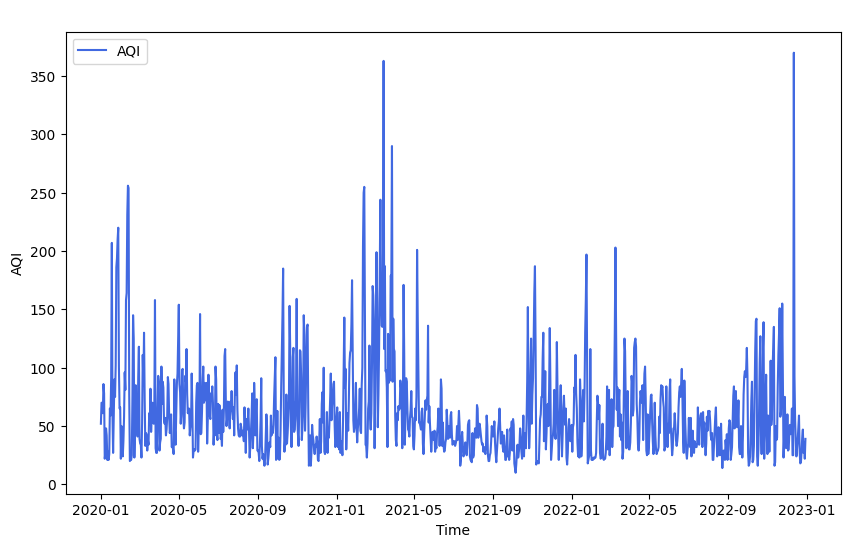

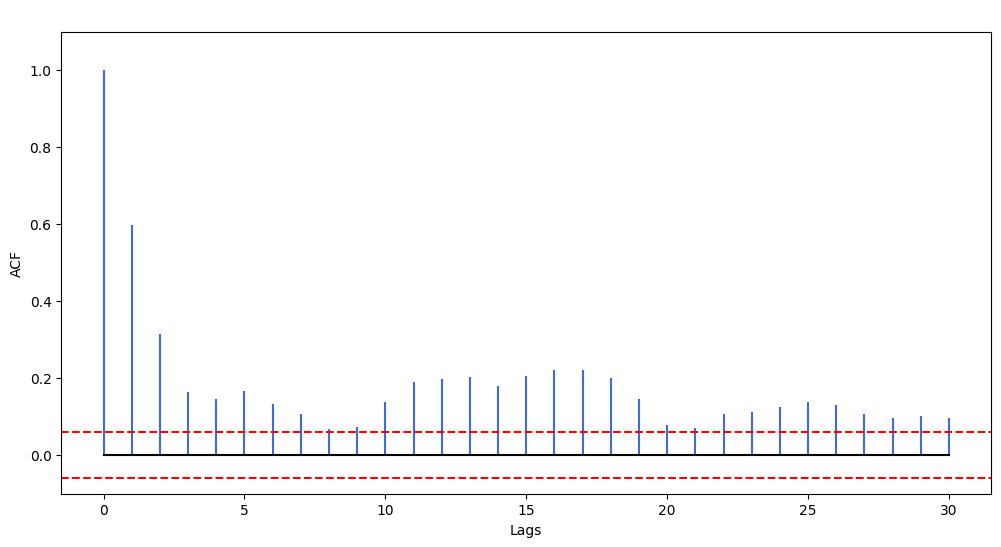

In [3]:
# Assuming train_data and other necessary variables are defined

# Plotting the AQI time series for the training data only
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['deal_data'], label='AQI', color='royalblue')
plt.title(' ')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
# Save the figure to the same directory as the current file
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_1.png'
plt.savefig(output_path)
plt.show()

# Calculate ACF values
acf_values = sm.tsa.stattools.acf(train_data['deal_data'], nlags=30)
lags = range(len(acf_values))

# Calculate the confidence interval line (significance level)
N = len(train_data['deal_data'])
conf_interval = 1.96 / np.sqrt(N)

# Plot the autocorrelation values
plt.figure(figsize=(12, 6))
plt.stem(lags, acf_values, linefmt='royalblue', markerfmt=' ', basefmt='k')
plt.axhline(y=conf_interval, linestyle='--', color='red')
plt.axhline(y=-conf_interval, linestyle='--', color='red')
plt.title(' ')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.ylim(-0.1, 1.1)
# Save the figure to the same directory as the current file
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_2.png'
plt.savefig(output_path)
plt.show()

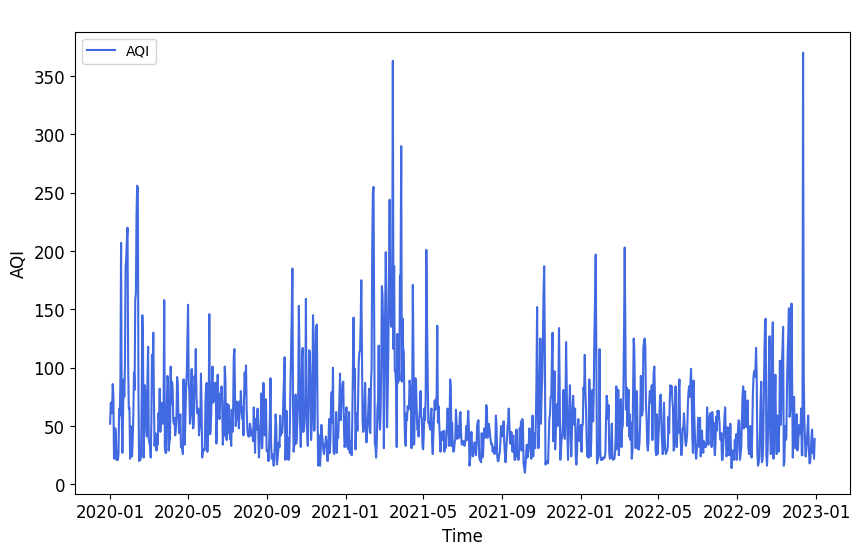

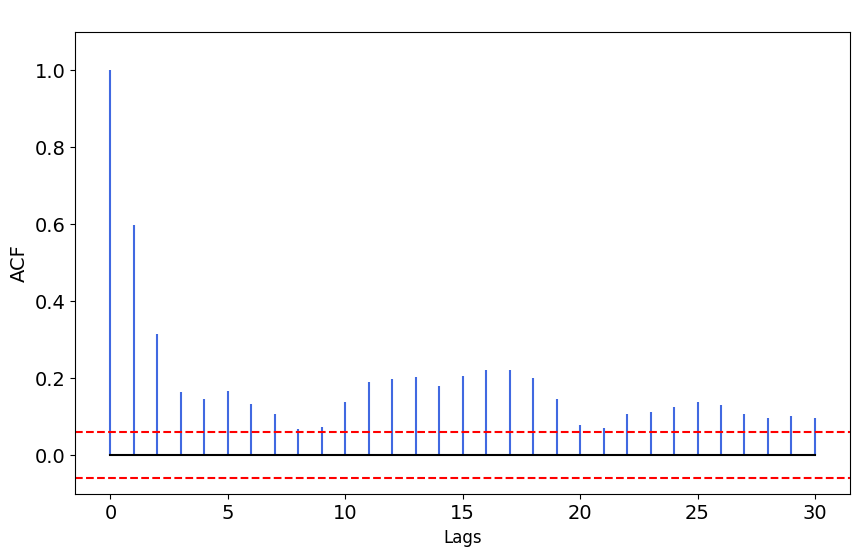

In [4]:
# Plotting the AQI time series for the training data only
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['deal_data'], label='AQI', color='royalblue')
plt.title(' ')
plt.xlabel('Time', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
# Save the figure to the same directory as the current file
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_1.png'
plt.savefig(output_path)
plt.show()

# Calculate ACF values
acf_values = sm.tsa.stattools.acf(train_data['deal_data'], nlags=30)
lags = range(len(acf_values))

# Calculate the confidence interval line (significance level)
N = len(train_data['deal_data'])
conf_interval = 1.96 / np.sqrt(N)

# Plot the autocorrelation values
plt.figure(figsize=(10, 6))
plt.stem(lags, acf_values, linefmt='royalblue', markerfmt=' ', basefmt='k')
plt.axhline(y=conf_interval, linestyle='--', color='red')
plt.axhline(y=-conf_interval, linestyle='--', color='red')
plt.title(' ')
plt.xlabel('Lags', fontsize=12)
plt.ylabel('ACF', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.1, 1.1)
# Save the figure to the same directory as the current file
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_2.png'
plt.savefig(output_path)
plt.show()

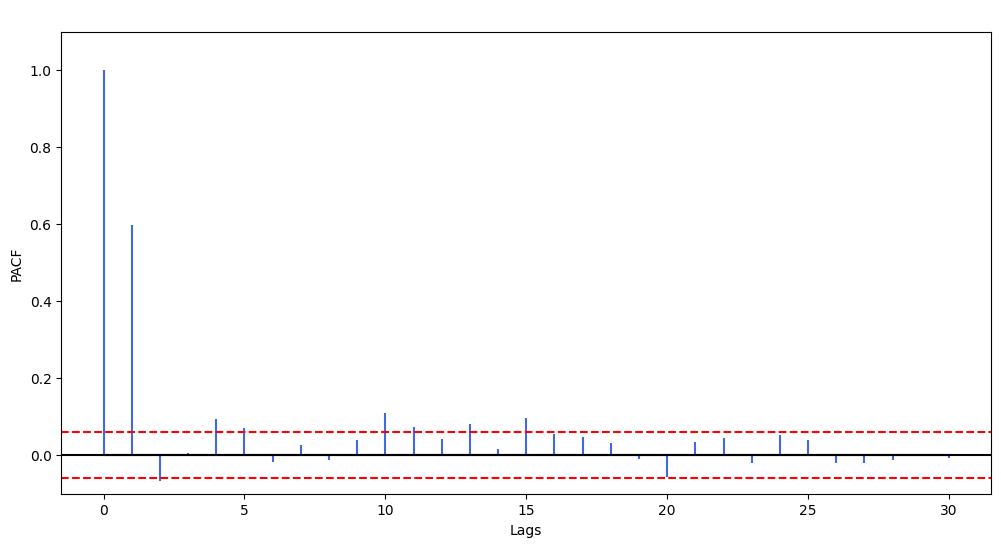

In [5]:
pacf_values = sm.tsa.stattools.pacf(train_data['deal_data'], nlags=30)

plt.figure(figsize=(12, 6))
plt.stem(range(len(pacf_values)), pacf_values, linefmt='royalblue', markerfmt=' ', basefmt='k')
plt.title(' ')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(train_data['deal_data'])), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(train_data['deal_data'])), linestyle='--', color='red')
plt.ylim(-0.1, 1.1)

output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_3.png'
plt.savefig(output_path)
plt.show()

In [6]:
# Stationarity test for the training data
adf_result = ADF(train_data['deal_data'])
adf_output = f"ADF：{adf_result}"
adf_output

"原始序列的ADF检验结果为：(-4.234960843601933, 0.0005746451864023293, 16, 1078, {'1%': -3.4364306491488814, '5%': -2.8642248442477976, '10%': -2.5681995044075987}, 10467.9547125014)"

In [7]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(train_data['deal_data'])

adf_output = f"原始序列的ADF检验结果为：统计值={adf_result[0]:.3f}, p={adf_result[1]:.3f}, 使用的滞后数={adf_result[2]}, 观测值数量={adf_result[3]}"
adf_critical_values = ", ".join([f"{key}: {value:.3f}" for key, value in adf_result[4].items()])
adf_output += f", 临界值={{ {adf_critical_values} }}, AIC信息量准则={adf_result[5]:.3f}"

print(adf_output)

原始序列的ADF检验结果为：统计值=-4.235, p值=0.001, 使用的滞后数=16, 观测值数量=1078, 临界值={ 1%: -3.436, 5%: -2.864, 10%: -2.568 }, AIC信息量准则=10467.955


In [8]:
# White noise test 
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(train_data['deal_data'], lags=30))  # 返回统计量和p值

差分序列的白噪声检验结果为：         lb_stat      lb_pvalue
1    392.664091   2.177240e-87
2    501.479894  1.273576e-109
3    531.325065  7.756457e-115
4    555.051142  8.261161e-119
5    585.538429  2.693523e-124
6    605.256674  1.713336e-127
7    617.743680  3.673261e-129
8    622.905984  2.779076e-129
9    628.663928  1.470366e-129
10   649.538004  4.227338e-133
11   689.100543  1.170014e-140
12   732.663577  4.469606e-149
13   779.024144  4.284125e-158
14   815.250258  6.043839e-165
15   862.687421  3.393166e-174
16   917.308664  5.540986e-185
17   972.232923  7.805489e-196
18  1017.149115  1.517276e-204
19  1041.060152  9.056766e-209
20  1047.745850  2.544844e-209
21  1053.524749  1.093703e-209
22  1066.601985  1.283771e-211
23  1080.545857  9.724526e-214
24  1098.489147  1.026006e-216
25  1120.163827  1.726546e-220
26  1138.920676  1.204967e-223
27  1151.733949  1.529529e-225
28  1162.238716  5.943565e-227
29  1173.908172  1.293765e-228
30  1184.646158  4.396814e-230


In [9]:
lb_stat = 392.664091
lb_pvalue = 2.177240e-87

print(f"差分序列的白噪声检验结果为：统计量={lb_stat:.3f}, p值={lb_pvalue:.3f}")

差分序列的白噪声检验结果为：统计量=392.664, p值=0.000


In [10]:
# AIC and BIC criteria
AIC = sm.tsa.stattools.arma_order_select_ic(train_data, max_ar=4, max_ma=4, ic='aic')['aic_min_order']

print('---AIC与BIC准则定阶---')
print('the AIC is {}\n'.format(AIC))

p = AIC[0]
q = AIC[1]
diff_num = 0 

E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


---AIC与BIC准则定阶---
the AIC is (2, 4)



E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
model = ARIMA(train_data, order=(p, diff_num, q))
results = model.fit()  

print('模型报告为：\n', results.summary())

residuals = results.resid

E:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


模型报告为：
                                SARIMAX Results                                
Dep. Variable:              deal_data   No. Observations:                 1095
Model:                 ARIMA(2, 0, 4)   Log Likelihood               -5347.203
Date:                Wed, 21 Aug 2024   AIC                          10710.406
Time:                        11:16:47   BIC                          10750.394
Sample:                    01-01-2020   HQIC                         10725.537
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.7399      7.163      8.479      0.000      46.700      74.780
ar.L1          0.1531      0.120      1.280      0.201      -0.081       0.388
ar.L2          0.8082      0.115      7.038 

In [12]:
lb_result = acorr_ljungbox(residuals, lags=list(range(1, 11)), return_df=True)

print(lb_result)

      lb_stat  lb_pvalue
1    0.001042   0.974250
2    0.055453   0.972654
3    0.162543   0.983397
4    0.263523   0.992046
5    0.426040   0.994582
6    0.454458   0.998349
7    1.151065   0.992010
8    3.062285   0.930388
9   11.606384   0.236420
10  12.156503   0.274719


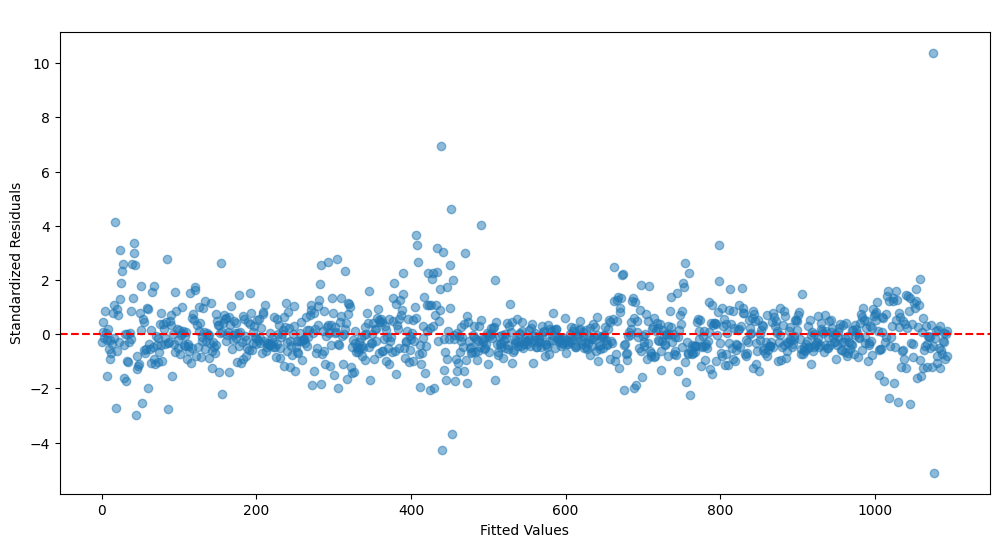

In [13]:
residuals_std = np.std(residuals)

standardized_residuals = residuals / residuals_std
plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(standardized_residuals)), standardized_residuals, alpha=0.5) 
plt.title(' ')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.axhline(0, color='red', linestyle='--')  
# Save the figure to the same directory as the current file
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_3.png'
plt.savefig(output_path)
plt.show()

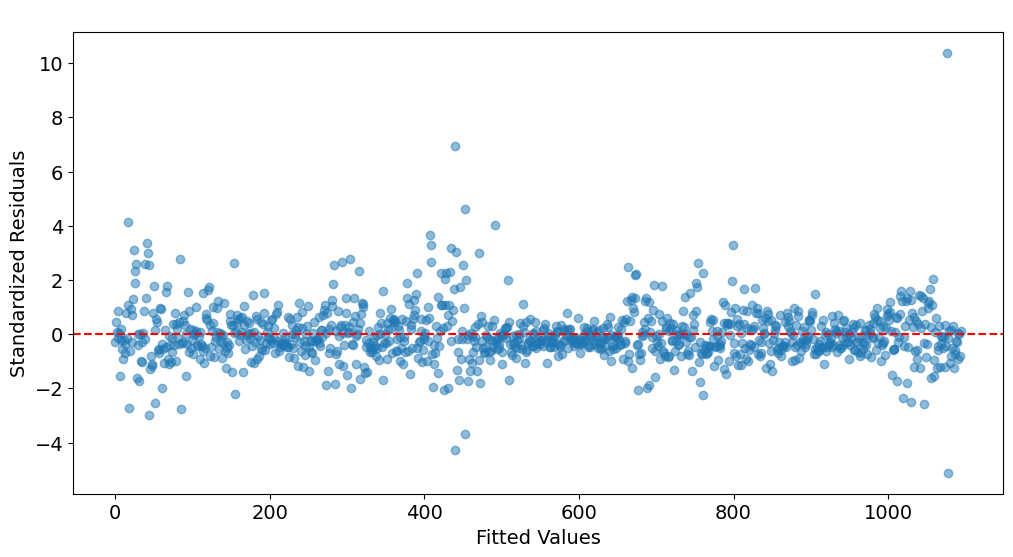

In [14]:
residuals_std = np.std(residuals)

standardized_residuals = residuals / residuals_std
plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(standardized_residuals)), standardized_residuals, alpha=0.5)  
plt.title(' ')
plt.xlabel('Fitted Values', fontsize=14)
plt.ylabel('Standardized Residuals', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(0, color='red', linestyle='--') 
# Save the figure to the same directory as the current file
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_3.png'
plt.savefig(output_path)
plt.show()

<Figure size 1200x600 with 0 Axes>

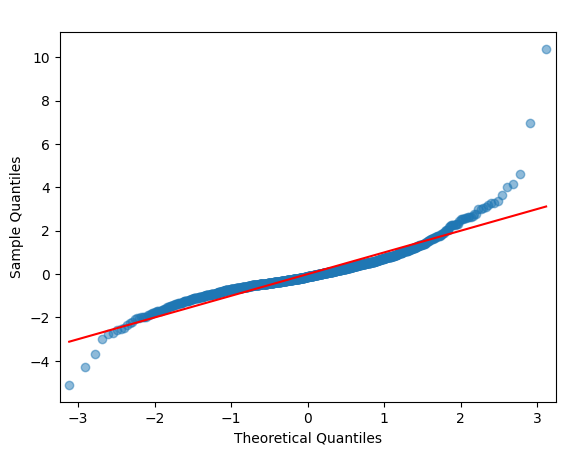

In [15]:
plt.figure(figsize=(12, 6))
sm.qqplot(standardized_residuals, line='s', alpha=0.5)  
plt.title(' ')
# Save the figure to the specified directory
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_4.png'
plt.savefig(output_path)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


      lb_stat  lb_pvalue
1    0.001042   0.974250
2    0.055453   0.972654
3    0.162543   0.983397
4    0.263523   0.992046
5    0.426040   0.994582
6    0.454458   0.998349
7    1.151065   0.992010
8    3.062285   0.930388
9   11.606384   0.236420
10  12.156503   0.274719


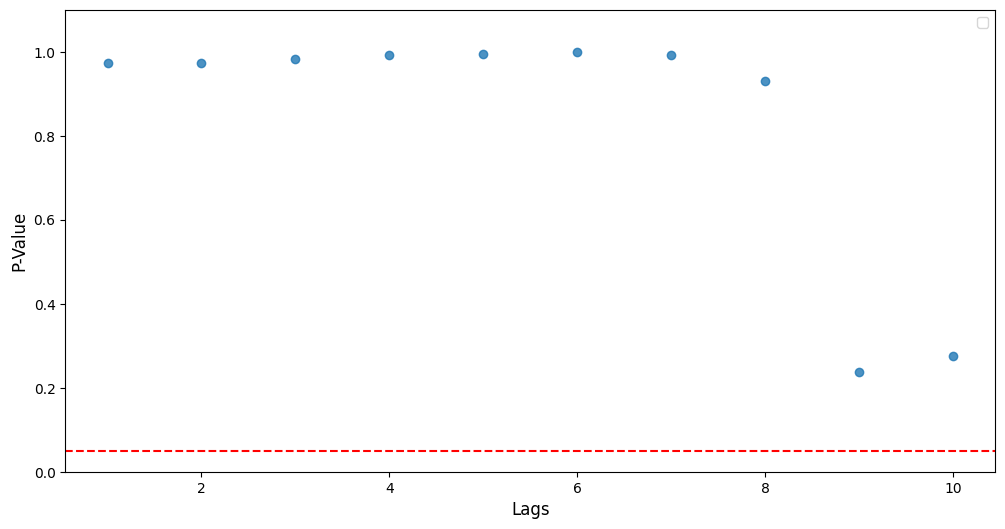

In [16]:
lb_result = acorr_ljungbox(residuals, lags=list(range(1, 11)), return_df=True)

print(lb_result)

plt.figure(figsize=(12, 6))
plt.plot(lb_result.index, lb_result['lb_pvalue'], marker='o', linestyle=' ', alpha=0.8)
plt.axhline(y=0.05, linestyle='--', color='red')
plt.xlabel('Lags', fontsize=12)
plt.ylabel('P-Value', fontsize=12)
plt.ylim(0, 1.1)
plt.legend()
# Save the figure to the specified directory
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_5.png'
plt.savefig(output_path)
plt.show()

In [17]:
history = list(train_data['deal_data'])
predictions = []

for t in range(len(test_data)):
    model = ARIMA(history, order=(2, 0, 4))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data['deal_data'][t]
    history.append(obs)
    print(f'Predicted={yhat}, Expected={obs}')

error = np.mean(np.abs((test_data['deal_data'] - predictions) / test_data['deal_data']))
print(f'Mean Absolute Percentage Error: {error * 100:.2f}%')

C:\Users\Liu\AppData\Local\Temp\ipykernel_21840\1991842034.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test_data['deal_data'][t]


Predicted=49.6192032850026, Expected=47
Predicted=49.53906153406339, Expected=38
Predicted=46.71362774277069, Expected=22
Predicted=32.36977400966698, Expected=37
Predicted=47.76991028112133, Expected=62
Predicted=58.87422253378121, Expected=106
Predicted=85.17250522453718, Expected=103
Predicted=77.60954694761797, Expected=66
Predicted=56.05139156643711, Expected=59
Predicted=54.54404185981375, Expected=34
Predicted=45.1776743721276, Expected=60
Predicted=58.97399473934811, Expected=82
Predicted=73.83296466572514, Expected=115
Predicted=89.5540608020338, Expected=100
Predicted=77.87746777552144, Expected=21
Predicted=30.546291655014564, Expected=23
Predicted=38.87642841831793, Expected=43
Predicted=57.00843023013723, Expected=80
Predicted=73.65111695577671, Expected=70
Predicted=62.42196947771948, Expected=71
Predicted=64.67352457346666, Expected=40
Predicted=45.87374958992009, Expected=56
Predicted=59.32627434485914, Expected=94
Predicted=81.45428741248504, Expected=59
Predicted=57.5

E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=154.83744091357585, Expected=170


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.05760856321967, Expected=189


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=132.8009447910118, Expected=108


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=88.20331584347616, Expected=78


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=74.87669398460321, Expected=244


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=185.6163921349834, Expected=124
Predicted=100.23939243729777, Expected=54


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=52.85653961748148, Expected=73
Predicted=84.62316744850943, Expected=127
Predicted=120.89724137842109, Expected=97


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=84.17160305576283, Expected=50
Predicted=63.85795898291687, Expected=79


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=85.19332462538989, Expected=45
Predicted=65.19532572202566, Expected=81
Predicted=83.0301940441723, Expected=148
Predicted=126.60209821184955, Expected=161


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.16945910376687, Expected=337


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=234.3435332254433, Expected=103


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=76.40458054054854, Expected=61
Predicted=64.74835086419529, Expected=59


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=77.87892108442463, Expected=52
Predicted=82.5019274117511, Expected=53
Predicted=61.45336555361525, Expected=92
Predicted=101.87923385371573, Expected=119
Predicted=103.47136862885864, Expected=108


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.64606275007307, Expected=85
Predicted=80.26595338312185, Expected=78
Predicted=84.86925938784753, Expected=100
Predicted=94.88068758907127, Expected=71
Predicted=78.05616854050339, Expected=40
Predicted=56.86288489331547, Expected=35
Predicted=59.792668340937986, Expected=42
Predicted=63.5420934017005, Expected=33
Predicted=55.366146593976175, Expected=50
Predicted=64.9633057332199, Expected=86
Predicted=86.15150412446668, Expected=177


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.25515372547335, Expected=306
Predicted=211.15664276269027, Expected=278


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=182.3174717724917, Expected=471


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=311.8984809188219, Expected=191


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.98427331683486, Expected=73
Predicted=65.03193202471448, Expected=49


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=71.14423837454005, Expected=82
Predicted=115.56322915645669, Expected=71
Predicted=76.41745191586381, Expected=78


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=95.53738082680496, Expected=74
Predicted=84.88367119795763, Expected=38
Predicted=66.92256338552687, Expected=33


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=59.14925995665959, Expected=52


E:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=78.06676335525677, Expected=56
Predicted=73.73492581385996, Expected=65
Predicted=77.6212704325966, Expected=51
Predicted=66.96350426406454, Expected=82
Predicted=87.93494649989903, Expected=67
Predicted=74.94535629847084, Expected=41
Predicted=58.159176497435176, Expected=42
Predicted=59.7155590980059, Expected=70
Predicted=81.14077514033289, Expected=77
Predicted=79.25120864136073, Expected=82
Predicted=80.51531961641072, Expected=53
Predicted=61.53142564225816, Expected=23
Predicted=45.32094456599397, Expected=29
Predicted=51.30927189857318, Expected=37
Predicted=57.68080528988152, Expected=49
Predicted=61.04865183302512, Expected=58
Predicted=65.05483093265897, Expected=56
Predicted=62.71516198997426, Expected=70
Predicted=70.77438821781027, Expected=57
Predicted=61.76707104214188, Expected=34
Predicted=47.0378797540905, Expected=70
Predicted=72.04390078124041, Expected=99
Predicted=89.84581181863092, Expected=84
Predicted=74.04739343155967, Expected=57
Predicted=56.68365

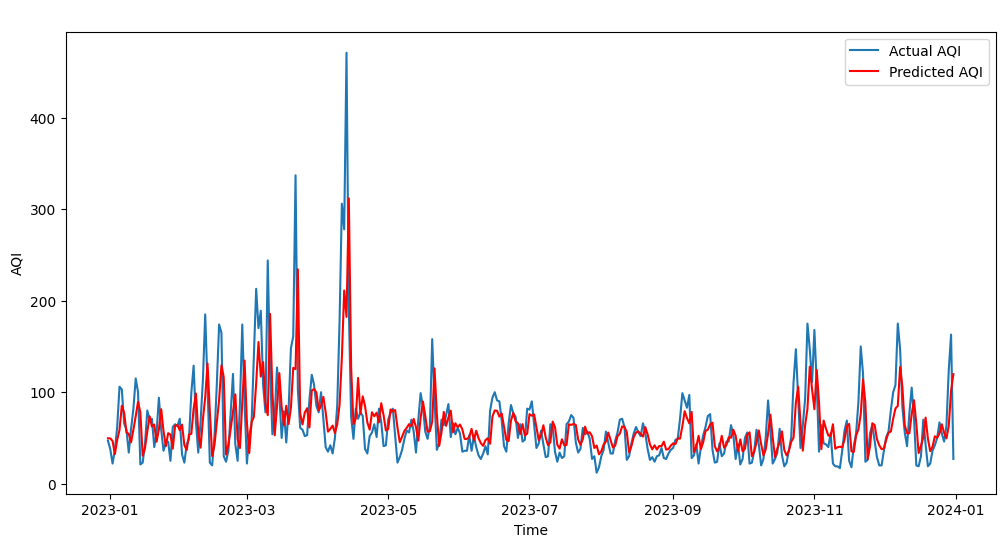

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['deal_data'], label='Actual AQI')
plt.plot(test_data.index, predictions, color='red', label='Predicted AQI')
plt.title(' ')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
# Save the figure to the same directory as the current file
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_6.png'
plt.savefig(output_path)

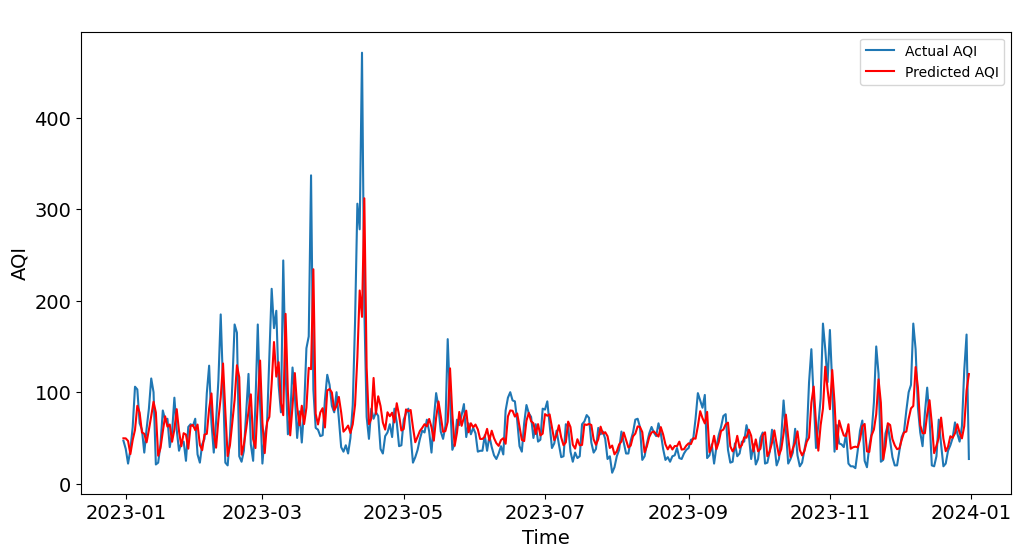

In [19]:

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['deal_data'], label='Actual AQI')
plt.plot(test_data.index, predictions, color='red', label='Predicted AQI')
plt.title(' ')
plt.xlabel('Time', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

# Save the figure to the same directory as the current file
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_6.png'
plt.savefig(output_path)
plt.show()

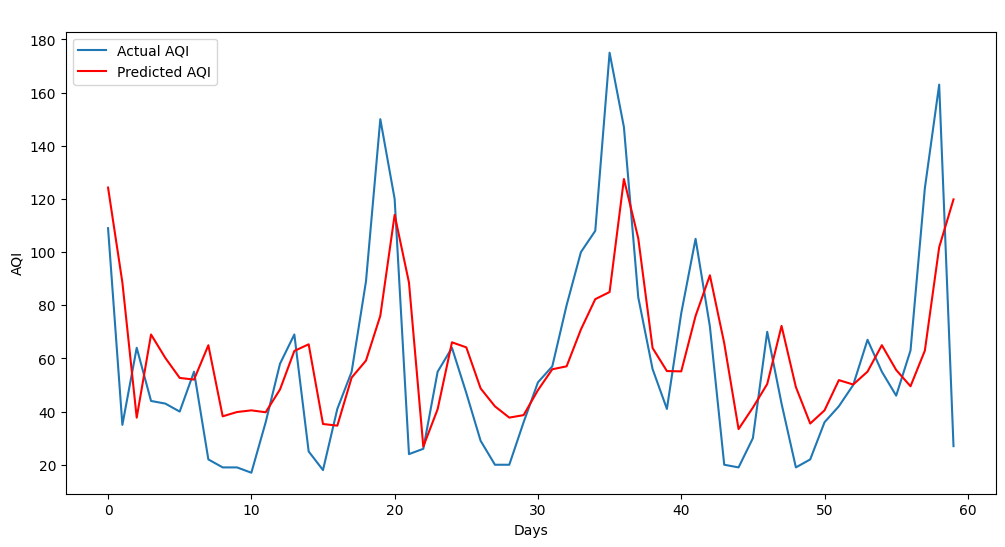

In [20]:
real_values = test_data['deal_data'][-60:].reset_index(drop=True)
predicted_values = predictions[-60:]

# 绘制预测结果
plt.figure(figsize=(12, 6))
plt.plot(real_values, label='Actual AQI')
plt.plot(predicted_values, color='red', label='Predicted AQI')
plt.title(' ')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.legend()
# Save the figure to the same directory as the current file
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_60.png'
plt.savefig(output_path)
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_data, predictions)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R²: {r2:.4f}')

Mean Absolute Error (MAE): 23.18
Mean Squared Error (MSE): 1367.52
Root Mean Squared Error (RMSE): 36.98
R²: 0.4169


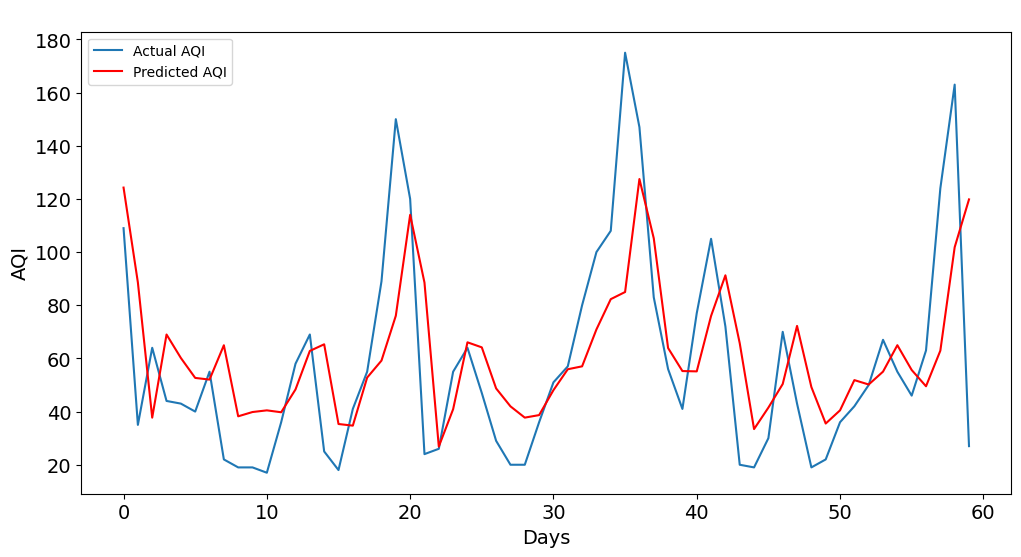

In [24]:
real_values = test_data['deal_data'][-60:].reset_index(drop=True)
predicted_values = predictions[-60:]

plt.figure(figsize=(12, 6))
plt.plot(real_values, label='Actual AQI')
plt.plot(predicted_values, color='red', label='Predicted AQI')
plt.title(' ')
plt.xlabel('Days', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
# Save the figure to the same directory as the current file
output_path = 'C:/Users/Liu/Downloads/8_dissertation/ARMA_aqi_60.png'
plt.savefig(output_path)
plt.show()